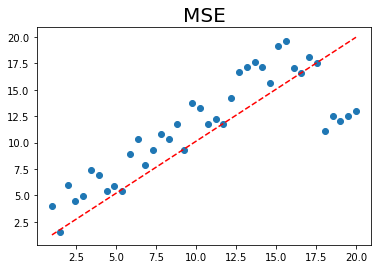

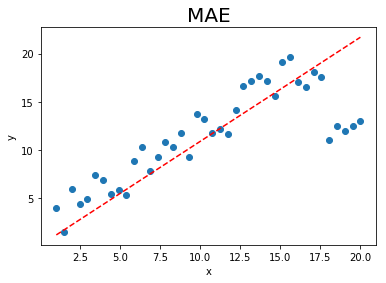

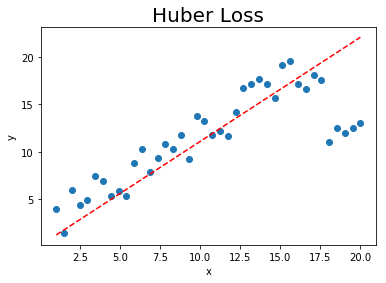

In [98]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 20, 40)
y = x + [np.random.choice(5) for _ in range(40)]
y[-5:] -= 8

X = np.vstack((np.ones_like(x),x))    # 引入常数项 1
m = X.shape[1]
# 参数初始化
W = np.zeros((1,2))

# 迭代训练 
num_iter = 20
lr = 0.01
J = []
for i in range(num_iter):
   y_pred = W.dot(X)
   loss = 1/(2*m) * np.sum((y-y_pred)**2)
#    loss = 1/(2*m) * np.sum(np.abs(y-y_pred))
   J.append(loss)
   W = W + lr * 1/m * (y-y_pred).dot(X.T)

# 作图
y1 = W[0,0] + W[0,1]*1
y2 = W[0,0] + W[0,1]*20
plt.scatter(x, y)
plt.plot([1,20],[y1,y2],'r--')
plt.title('MSE',fontsize=20)
plt.show()

X = np.vstack((np.ones_like(x),x))    # 引入常数项 1
m = X.shape[1]
# 参数初始化
W = np.zeros((1,2))

# 迭代训练 
num_iter = 20
lr = 0.01
J = []
for i in range(num_iter):
   y_pred = W.dot(X)
   loss = 1/m * np.sum(np.abs(y-y_pred))
   J.append(loss)
   mask = (y-y_pred).copy()
   mask[y-y_pred > 0] = 1
   mask[mask <= 0] = -1
   W = W + lr * 1/m * mask.dot(X.T)

# 作图
y1 = W[0,0] + W[0,1]*1
y2 = W[0,0] + W[0,1]*20
plt.scatter(x, y)
plt.plot([1,20],[y1,y2],'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MAE',fontsize=20)
plt.show()

X = np.vstack((np.ones_like(x),x))    # 引入常数项 1
m = X.shape[1]
# 参数初始化
W = np.zeros((1,2))

# 迭代训练 
num_iter = 20
lr = 0.01
delta = 2
J = []
for i in range(num_iter):
   y_pred = W.dot(X)
   loss = 1/m * np.sum(np.abs(y-y_pred))
   J.append(loss)
   mask = (y-y_pred).copy()
   mask[y-y_pred > delta] = delta
   mask[mask < -delta] = -delta
   W = W + lr * 1/m * mask.dot(X.T)

# 作图
y1 = W[0,0] + W[0,1]*1
y2 = W[0,0] + W[0,1]*20
plt.scatter(x, y)
plt.plot([1,20],[y1,y2],'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Huber Loss',fontsize=20)
plt.show()

In [99]:
def huber(res, delta):
    res = abs(res)
    return (res<=delta)*(res**2/2) + (res>delta)*(delta*res-delta**2/2)

Text(0.5, 1.0, 'Loss Function for Regression')

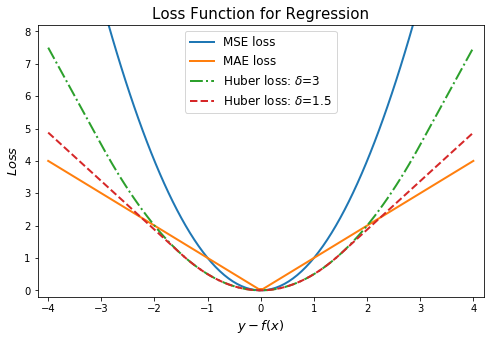

In [102]:

plt.figure(figsize=(8,5))
plt.axis([-4.2,4.2,-0.2,8.2])
x = np.linspace(-4,4,100)
plt.plot(x, x**2, label="MSE loss", lw=2)
plt.plot(x,np.where(x>=0,x,-x), label="MAE loss", lw=2)
plt.plot(x,huber(x, 3), label="Huber loss: $\delta$={}".format(3),lw=2, linestyle="-.")
plt.plot(x,huber(x, 1.5), label="Huber loss: $\delta$={}".format(1.5),lw=2,linestyle="--")

plt.legend(loc='upper center', fontsize=12)
plt.xlabel("$y-f(x)$",fontsize=13)
plt.ylabel("$Loss$",fontsize=13)
plt.title("Loss Function for Regression",fontsize=15)